In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt

### CREATE AGG MATRIX AND READ DATA

In [2]:
data = pd.read_csv("data.csv", index_col=0) # 1 + 1*4 + 1*4*7 + 1*4*7*2
agg_mat_df = pd.read_csv("agg_mat.csv", index_col=0) # matrix of aggregated data with bottom time series

In [3]:
data.head()

,total,hol,vfr,bus,oth,nsw-hol,vic-hol,qld-hol,sa-hol,wa-hol,...,qld-oth-city,qld-oth-noncity,sa-oth-city,sa-oth-noncity,wa-oth-city,wa-oth-noncity,tas-oth-city,tas-oth-noncity,nt-oth-city,nt-oth-noncity
1998-03-31,84503,45906,26042,9815,2740,17589,10412,9078,3089,3449,...,431,271,244,73,168,37,76,24,35,8
1998-06-30,65312,29347,20676,11823,3466,11027,6025,6310,1935,2454,...,669,170,142,221,170,99,36,61,69,39
1998-09-30,72753,32492,20582,13565,6114,8910,5060,11733,1569,3398,...,270,1164,397,315,380,1166,32,23,150,338
1998-12-31,70880,31813,21613,11478,5976,10658,5481,8109,2270,3561,...,214,535,194,260,410,1139,48,43,172,453
1999-03-31,86893,46793,26947,10027,3126,16152,10958,10047,3023,4287,...,458,557,147,33,162,28,77,60,15,47


In [4]:
### create global matrix A
### create list of number of TS in each level
levels = [0, 1,1*4,1*4*7,1*4*7*2]
levels_left = [0, 1, 5, 5+28]
levels_right = [0, 4, 4+28, 4+28+56]
nb_ts_levels = [1, 4, 28, 56]
nb_ts_agg_levels = [1,4,7,2]

def matrix_per_level(global_Matrix, levels_left, levels_right, l):
    return np.array(global_Matrix.iloc[levels_left[l-1]:levels_left[l], levels_right[l-1]:levels_right[l]])

def creat_agg_mat(nb_ts_levels, nb_ts_agg_levels):
    nb_total_ts = sum(nb_ts_levels)
    nb_ts_agg =sum(nb_ts_levels[:len(nb_ts_levels)-1])
    global_Matrix = pd.DataFrame(np.zeros((nb_ts_agg, nb_total_ts-1)))
    
    
    for j in range(0,nb_ts_levels[1]):
        global_Matrix.iloc[0,j] = 1
    i=1
    for k in range(nb_ts_levels[1]):
        for j in range(4+k*7,4+(k+1)*7):
            global_Matrix.iloc[i,j] = 1
            #print(i,j)
        i+=1
    for k in range(nb_ts_levels[2]):
        for j in range(4+28+k*2,4+28+(k+1)*2):
            global_Matrix.iloc[i,j] = 1
            #print(i,j)
        i+=1
            

    return global_Matrix

In [5]:
A = creat_agg_mat(nb_ts_levels, nb_ts_agg_levels)
A

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
matrix_per_level(A, levels_left, levels_right, 2)

array([[1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.]])

### MODEL

In [92]:
# Split the data
### pivot data such as index is the name of columns
#data = data.pivot(index='date', columns='symbol', values='close')
pivot_df = data.T

input_size = 89*20
pred_length = 1

In [93]:
def calculate_wmape(actual_values, forecasted_values):
    n = len(actual_values)
    num = np.sum(np.abs(actual_values - forecasted_values))
    den = np.sum(np.abs(actual_values))
    wmape = 100*num/den
    return wmape

In [94]:
X_train = []
y_train = []
for i in range(35-20):
    X = pivot_df.iloc[:,i:20+i].T.to_numpy().reshape(1,-1)
    X_train.append(X[0])
    y = pivot_df.iloc[:,20+i:21+i].T.to_numpy()
    y_train.append(y[0])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = pivot_df.iloc[:,15:35].T.to_numpy().reshape(1,-1)
y_test = pivot_df.iloc[:,35:36].T.to_numpy()


In [95]:
X_train.shape

(15, 1780)

In [96]:
y_train.shape

(15, 89)

In [97]:
X_test.shape

(1, 1780)

In [98]:
y_test

array([[69544, 31845, 22758, 10784,  4157,  9252,  5288,  9909,  2162,
         3536,   887,   811,  8079,  4458,  5695,  1619,  2178,   331,
          398,  3159,  1888,  2910,   678,  1477,   281,   391,  1014,
          525,  1267,   332,   750,   104,   165,  1519,  7733,  1818,
         3470,  4176,  5733,   551,  1611,  1228,  2308,   236,   651,
          451,   360,  2501,  5578,  2055,  2403,  2223,  3472,   851,
          768,  1241,   937,   133,   198,   160,   238,  1342,  1817,
         1077,   811,  1313,  1597,   363,   315,   539,   938,   160,
          121,   181,   210,   419,   595,   200,   325,   836,   431,
          165,   167,   331,   419,    67,    37,    27,   138]],
      dtype=int64)

In [99]:
pivot_df

,1998-03-31,1998-06-30,1998-09-30,1998-12-31,1999-03-31,1999-06-30,1999-09-30,1999-12-31,2000-03-31,2000-06-30,...,2004-09-30,2004-12-31,2005-03-31,2005-06-30,2005-09-30,2005-12-31,2006-03-31,2006-06-30,2006-09-30,2006-12-31
total,84503,65312,72753,70880,86893,66866,72182,68318,85651,64467,...,73840,70217,85992,59637,66846,63392,82637,67523,65938,69544
hol,45906,29347,32492,31813,46793,31442,34623,31118,47030,30852,...,33643,29070,44043,26719,30947,26418,43601,30777,30938,31845
vfr,26042,20676,20582,21613,26947,19481,20026,20431,24284,19430,...,23254,24212,28811,19635,19743,19954,26245,22948,19751,22758
bus,9815,11823,13565,11478,10027,11875,11713,10582,9734,10590,...,11998,10266,9084,9161,11000,11547,8712,10099,11352,10784
oth,2740,3466,6114,5976,3126,4068,5820,6187,4603,3595,...,4945,6669,4054,4122,5156,5473,4079,3699,3897,4157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wa-oth-noncity,37,99,1166,1139,28,161,243,568,266,299,...,677,823,105,250,421,385,139,234,213,419
tas-oth-city,76,36,32,48,77,70,26,34,49,33,...,38,66,76,31,37,50,36,84,33,67
tas-oth-noncity,24,61,23,43,60,90,49,56,122,47,...,24,32,96,49,17,53,236,85,68,37
nt-oth-city,35,69,150,172,15,72,75,145,37,41,...,126,139,86,91,196,49,50,29,77,27


##### First model without coherency

In [100]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam

In [186]:
## fix seed
keras.utils.set_random_seed(42)

# Enable eager execution
tf.config.run_functions_eagerly(True)

# Create a sequential model
inp1 = Input(shape=(input_size,))
h1_w1 = Dense(500, activation='relu')(inp1)
h2_w1  = Dense(500, activation='relu')(h1_w1)
h3_w1 = Dense(100, activation='relu')(h2_w1)
out1 = Dense(89, activation='linear')(h3_w1)

mdl1 = Model(inputs=inp1, outputs=out1)

mdl1.compile(loss="mse", optimizer='adam')

history1 = mdl1.fit(X_train, y_train, epochs=35, batch_size=5)

Epoch 1/35
3/3 [==============================] - 0s 24ms/step - loss: 70799352.0000
Epoch 2/35
3/3 [==============================] - 0s 24ms/step - loss: 42126200.0000
Epoch 3/35
3/3 [==============================] - 0s 20ms/step - loss: 29739484.0000
Epoch 4/35
3/3 [==============================] - 0s 21ms/step - loss: 19467804.0000
Epoch 5/35
3/3 [==============================] - 0s 21ms/step - loss: 11580274.0000
Epoch 6/35
3/3 [==============================] - 0s 34ms/step - loss: 6497155.0000
Epoch 7/35
3/3 [==============================] - 0s 20ms/step - loss: 3866513.5000
Epoch 8/35
3/3 [==============================] - 0s 21ms/step - loss: 2524481.2500
Epoch 9/35
3/3 [==============================] - 0s 21ms/step - loss: 2354274.2500
Epoch 10/35
3/3 [==============================] - 0s 25ms/step - loss: 2312625.2500
Epoch 11/35
3/3 [==============================] - 0s 20ms/step - loss: 1902275.8750
Epoch 12/35
3/3 [==============================] - 0s 29ms/step - los

In [187]:
mdl1.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 1780)]            0         
                                                                 
 dense_90 (Dense)            (None, 500)               890500    
                                                                 
 dense_91 (Dense)            (None, 500)               250500    
                                                                 
 dense_92 (Dense)            (None, 100)               50100     
                                                                 
 dense_93 (Dense)            (None, 89)                8989      
                                                                 
Total params: 1,200,089
Trainable params: 1,200,089
Non-trainable params: 0
_________________________________________________________________


In [188]:
y_predict = np.array(mdl1.predict(X_test))#.reshape(-1)
calculate_wmape(y_test, y_predict)

1/1 [==============================] - 0s 24ms/step


10.99591187958776

#### MODEL FOR HIERARCHICAL TIME SERIES

In [189]:
lengths = [1, 4, 28, 56]
def reshape_weights(weight, lengths):
    start_idx = 0
    result = []
    for length in lengths:
        sub_array = weight[start_idx:start_idx + length]
        result.append(sub_array)
        start_idx += length

    result = np.array(result)
    return result

In [190]:
# Assuming you have X_train and y_train
# Assuming you have lengths, A, levels_left, and levels_right defined

## fix seed
keras.utils.set_random_seed(42)

# Enable eager execution
tf.config.run_functions_eagerly(True)

layer = 4

# Define your custom loss function
def custom_loss_with_regularization(reg_weight, weight_matrix, lengths, A, levels_left, levels_right):
    def loss(y_true, y_pred):
        mse_loss = keras.losses.mean_squared_error(y_true, y_pred)  # MSE loss
        
        def loss_up(weight_matrix):
            weights_list = weight_matrix
            n, m = weights_list.shape
            regularization_loss = 0

            for i in range(n):
                w = reshape_weights(weights_list[i], lengths)
                for l in range(len(w) - 1):
                    mat_agg = matrix_per_level(A, levels_left, levels_right, l + 1)
                    mat_agg = tf.convert_to_tensor(mat_agg, dtype=tf.float32)  # Convert to TensorFlow tensor
                    w_l = w[l]
                    w_l2 = w[l + 1]
                    w_l_expanded = tf.expand_dims(w_l, axis=0)
                    w_l2_expanded = tf.expand_dims(w_l2, axis=-1)
                    regularization_loss += tf.reduce_sum(w_l_expanded - tf.transpose(tf.matmul(mat_agg, w_l2_expanded)))
            
            return regularization_loss
        
        custom_reg_loss = loss_up(weight_matrix)
        total_loss = mse_loss + reg_weight * custom_reg_loss 
        return total_loss
    
    return loss


# Create a sequential model
inp = Input(shape=(input_size,))
h1_w = Dense(1000, activation='relu')(inp)
h2_w  = Dense(500, activation='relu')(h1_w)
h3_w = Dense(100, activation='relu')(h2_w)
out = Dense(89, activation='linear')(h3_w)


mdl = Model(inputs=inp, outputs=out)

# Compile the model with the custom loss function and an optimizer
custom_loss = custom_loss_with_regularization(0.01, mdl.layers[layer].kernel, lengths, A, levels_left, levels_right)

mdl.compile(loss=custom_loss, optimizer='adam')

history = mdl.fit(X_train, y_train, epochs=35, batch_size=5)

Epoch 1/35
3/3 [==============================] - 3s 961ms/step - loss: 85183232.0000
Epoch 2/35
3/3 [==============================] - 3s 911ms/step - loss: 49573000.0000
Epoch 3/35
3/3 [==============================] - 2s 754ms/step - loss: 37245548.0000
Epoch 4/35
3/3 [==============================] - 3s 890ms/step - loss: 27041666.0000
Epoch 5/35
3/3 [==============================] - 2s 849ms/step - loss: 18936380.0000
Epoch 6/35
3/3 [==============================] - 3s 874ms/step - loss: 12232674.0000
Epoch 7/35
3/3 [==============================] - 3s 879ms/step - loss: 7287186.0000
Epoch 8/35
3/3 [==============================] - 2s 752ms/step - loss: 4262744.5000
Epoch 9/35
3/3 [==============================] - 2s 839ms/step - loss: 2801494.2500
Epoch 10/35
3/3 [==============================] - 2s 763ms/step - loss: 2405767.2500
Epoch 11/35
3/3 [==============================] - 2s 740ms/step - loss: 2254626.2500
Epoch 12/35
3/3 [==============================] - 2s 743

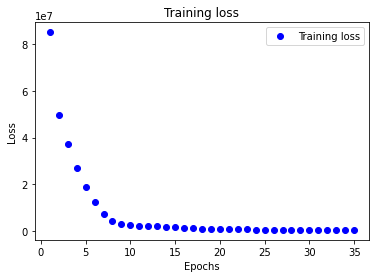

In [191]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict["loss"]
#val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [192]:
y_predict = np.array(mdl.predict(X_test))#.reshape(-1)
calculate_wmape(y_test, y_predict)

1/1 [==============================] - 0s 32ms/step


12.483014256519757

#### METRIC WMAPE

In [194]:
total_ts = [0,1,5,5+28,5+28+56]
def wmape_level(actual_value, forecasted_value, total_ts, lengths):
    nb_levels = len(lengths)
    wmapes = []
    for l in range(nb_levels):
        actual_value_ts = actual_value[:, total_ts[l]:total_ts[l+1]]
        forecasted_value_ts = forecasted_value[:, total_ts[l]:total_ts[l+1]]
        wmapes.append(calculate_wmape(actual_value_ts, forecasted_value_ts))
    return wmapes

In [195]:
wmape_level(y_test, y_predict, total_ts, lengths)

[5.022730663321063, 5.999857666549235, 14.92779105438896, 23.981677641819772]

### METRIC RMSSE

In [202]:
### I have an array of shape (89,5)
### create dataframe with predictions
def create_df(y_predict, pred_length, data):
    ### dataframe with name of columns same as in data_for_model_000
    ### create a dataframe based on data, remove last pred_length rows, and add y_predict
    ### return dataframe
    y_predict_df = y_predict.astype(np.float32)
    y_predict_df = pd.DataFrame(y_predict_df)
    y_predict_df = y_predict_df
    df = data.copy()
    for i,col in enumerate(data.columns):
        df[col][-(pred_length):] = y_predict_df[:][i]
    return df

In [203]:
pred_length = 1
data_pred = create_df(y_predict, pred_length, data)

C:\Users\hamza\AppData\Local\Temp\ipykernel_37764\1125308681.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][-(pred_length):] = y_predict_df[:][i]


In [215]:
def rmsse_ts(pred_length, data, data_pred, ts):
    H = pred_length
    T = data.shape[0] - H
    ts_array = data.iloc[:,ts].values
    ts_array_pred = data_pred.iloc[:,ts].values
    e = (1/H)*np.sum(ts_array[t] - ts_array_pred[t] for t in range(T, T+H))**2
    e_naive = (1/(T-1))*np.sum(ts_array[t] - ts_array[t-1] for t in range(1, T))**2
    return np.sqrt(e/e_naive)

In [216]:
rmsse_ts(pred_length, data, data_pred, 88)

C:\Users\hamza\AppData\Local\Temp\ipykernel_37764\1879541792.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e = (1/H)*np.sum(ts_array[t] - ts_array_pred[t] for t in range(T, T+H))**2
C:\Users\hamza\AppData\Local\Temp\ipykernel_37764\1879541792.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e_naive = (1/(T-1))*np.sum(ts_array[t] - ts_array[t-1] for t in range(1, T))**2


42.317130648143255

In [219]:
total_ts = [0,1,5,5+28,5+28+56]
def rmsse_level(pred_length, data, data_pred, total_ts, lengths):
    nb_levels = len(lengths)
    r_l = [0]*nb_levels
    for l in range(nb_levels):
        for j in range(total_ts[l], total_ts[l+1]):
            #print(l, j)
            r_l[l] += (1/lengths[l])*rmsse_ts(pred_length, data, data_pred, j)
    #print(r_l)
    R = np.mean(r_l)
    return r_l, R

In [220]:
rmsse_level(pred_length, data, data_pred, total_ts, lengths)

C:\Users\hamza\AppData\Local\Temp\ipykernel_37764\1879541792.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e = (1/H)*np.sum(ts_array[t] - ts_array_pred[t] for t in range(T, T+H))**2
C:\Users\hamza\AppData\Local\Temp\ipykernel_37764\1879541792.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e_naive = (1/(T-1))*np.sum(ts_array[t] - ts_array[t-1] for t in range(1, T))**2


([1.0970945608944958, 2.85888026933766, 66.51300214989394, 19.141512969637468],
 22.402622487440887)